In [6]:
import os
from fidelity_simulation import FidelitySimulation
from pulse import RectangularReadoutPulse

In [7]:
# current_path = os.path.abspath("")
# data_dir_path = os.path.join(current_path, "data")
# s_parameters_file_state_1 = os.path.join(
#     data_dir_path,
#     "hfss_resonance_simulator_Resonator_7252612e-6GHz_2_ports_v12_shifted_mock_156_kHz.s2p",
# )
# s_parameters_file_state_0 = os.path.join(
#     data_dir_path,
#     "hfss_resonance_simulator_Resonator_7252612e-6GHz_2_ports_v12.s2p"
# )
#
# shift_f = 156 * 10 ** 3
# f_state_0 = 7.2669 * 10 ** 9
# pulse_frequency = f_state_0 + shift_f / 2


In [8]:
current_path = os.path.abspath("")
data_dir_path = os.path.join(current_path, "data")
s_parameters_file_state_1 = os.path.join(
    data_dir_path,
    "data_00000_1.s2p",
)
s_parameters_file_state_0 = os.path.join(
    data_dir_path,
    "data_00000_0.s2p"
)

pulse_frequency = 6.065212860 * 10 ** 9

In [9]:
def run(pulse_samples_number):
    pulse_length = 2 * 10 ** (-6)

    print("simulation dt =", pulse_length / pulse_samples_number * 10 ** 9, "ns")

    rect_readout_pulse = RectangularReadoutPulse(
        carrier_frequency=pulse_frequency,
        pulse_duration=pulse_length,
        pulse_power_dbm=-123,
        total_signal_time=pulse_length,
        pulse_samples_number=pulse_samples_number,
    )

    rect_readout_pulse.plot_pulse()

    fidelity_simulation = FidelitySimulation(
        s_parameters_file_state_0=s_parameters_file_state_0,
        s_parameters_file_state_1=s_parameters_file_state_1,
        readout_pulse=rect_readout_pulse,
        IQ_projection_frequency=pulse_frequency + 10e6,  # f_fi = 200MHz
        num_iterations=500,
        readout_dt=1e-9,
        plot_pulses=False,
        plot_result=True,
        disable_progress_bar=False,
    )

    fidelity = fidelity_simulation.run()

    print("fidelity =", fidelity)


simulation dt = 0.0002384185791015625 ns


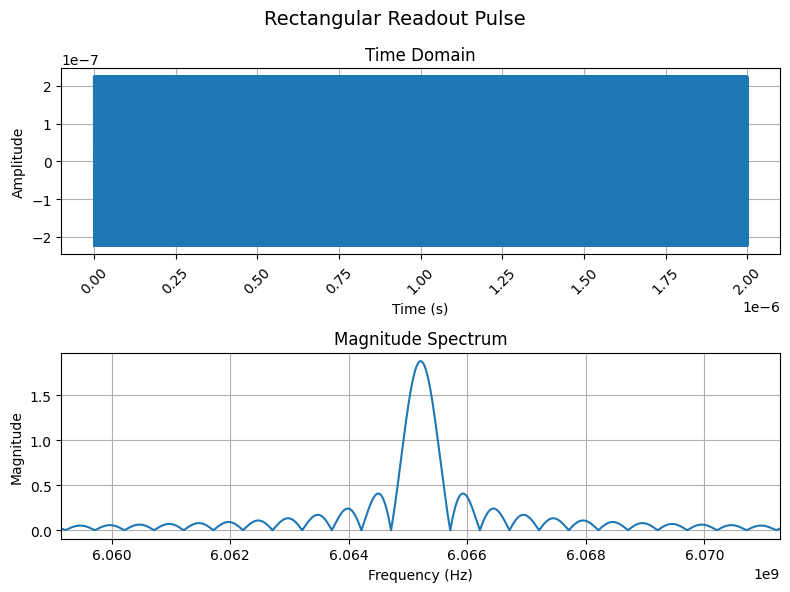

100%|██████████| 500/500 [05:58<00:00,  1.40it/s, Transited Pulse |1>]


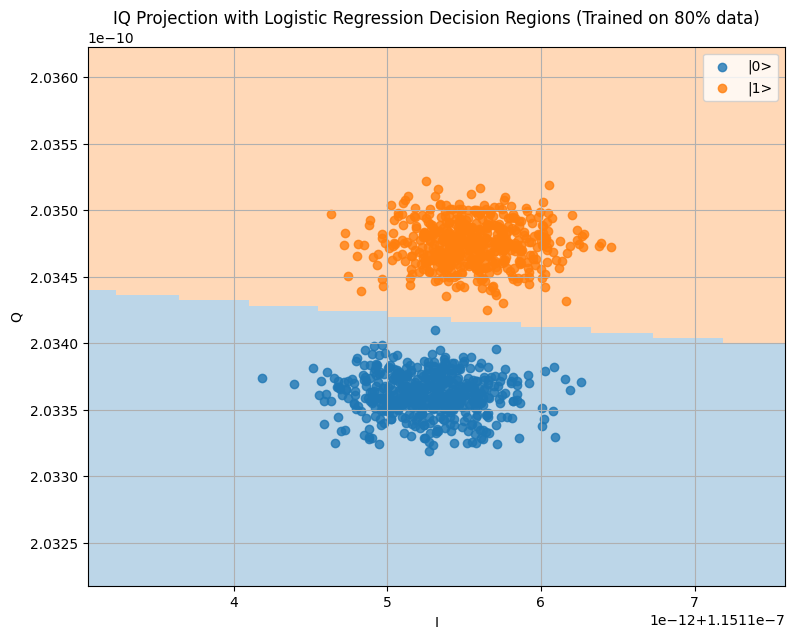

fidelity = 1.0
CPU times: total: 25.5 s
Wall time: 12min 30s


In [10]:
%%time
run(pulse_samples_number=2 ** 23)